# Robust training with MOM on PyTorch

In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
import numpy.random as alea
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from random import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import progressbar
import momAPI.nn.indexed_dataset as indexed_dataset
import momAPI.nn.utilities as utilities
import momAPI.nn.MOM_training as MOM_training
import momAPI.nn.MOM_sampler as MOM_sampler
import momAPI.nn.classical_nn_training as class_train
from math import log
import seaborn as sns

momAPI package
In nn __init__
In procedure __init__
In Cross_validation __init__
In Linear_models __init__


In [2]:
plt.style.use('seaborn-darkgrid')
random_seed = 7
alea.seed(random_seed)

### Test on custom model

Let $U_1,U_2$ be stochastic function, and $Y = \sigma(U_1)\sigma(2U_2)$, we want to predict Y knowing $U_1$ and $U_2$ but there are outliers in the data.

In [3]:
n_obs = 2000
n_outliers = 60

U1 = np.random.normal(0,1,n_obs)
U2 = np.random.normal(0,1,n_obs)

U1_test = np.random.normal(0,1,n_obs)
U2_test = np.random.normal(0,1,n_obs)

outliers_pos = np.random.randint(0, n_obs, n_outliers)

U_test = torch.FloatTensor(np.vstack((U1_test,U2_test)).transpose())
U = torch.FloatTensor(np.vstack((U1,U2)).transpose())

U1, U2 = torch.FloatTensor(U1), torch.FloatTensor(U2)
U1_test, U2_test = torch.FloatTensor(U1_test), torch.FloatTensor(U2_test)

Y = torch.sigmoid(U1) * torch.sigmoid(U2)
Y_test = torch.sigmoid(U1_test) * torch.sigmoid(U2_test)

for i in outliers_pos:
    Y[i] = torch.rand(1)

data_train = indexed_dataset.Dataset(U , Y)
data_test = indexed_dataset.Dataset(U_test , Y_test)

In [4]:
class nn(torch.nn.Module):
    
    #Our batch shape for input x is (3 , 64 , 64)
    
    def __init__(self):
        super(nn, self).__init__()

        self.layer = torch.nn.Linear(2, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.layer(x))
        x = x.view(-1)
        return(x)

In [5]:
nn_ = nn()
optimizer = torch.optim.SGD( nn_.parameters(), lr=1)
loss_ = torch.nn.modules.loss.MSELoss(reduce = 'mean')
MOM_nn = MOM_training.mom_net(nn_ , optimizer , loss_ , random_seed = random_seed, n_epochs = 100 , batch_size = 16, n_hist = 100)
MOM_nn.fit(data_train, data_val = data_test)

/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch n°0 ( 0.0 sec) : loss = 0.09307778626680374 ,validation loss =  0.08386699110269547 , accuracy : None , validation accuracy : None
Epoch n°1 ( 0.0 sec) : loss = 0.07889769971370697 ,validation loss =  0.06963273882865906 , accuracy : None , validation accuracy : None
Epoch n°2 ( 0.0 sec) : loss = 0.07108174264431 ,validation loss =  0.058128394186496735 , accuracy : None , validation accuracy : None
Epoch n°3 ( 0.0 sec) : loss = 0.057208046317100525 ,validation loss =  0.04645609110593796 , accuracy : None , validation accuracy : None
Epoch n°4 ( 0.0 sec) : loss = 0.0457729697227478 ,validation loss =  0.03865407407283783 , accuracy : None , validation accuracy : None
Epoch n°5 ( 0.0 sec) : loss = 0.03818732872605324 ,validation loss =  0.03298265114426613 , accuracy : None , validation accuracy : None
Epoch n°6 ( 0.0 sec) : loss = 0.034080568701028824 ,validation loss =  0.02626623585820198 , accuracy : None , validation accuracy : None
Epoch n°7 ( 0.0 sec) : loss = 0.0252421982

Epoch n°59 ( 0.0 sec) : loss = 0.001670650439336896 ,validation loss =  0.0014501117402687669 , accuracy : None , validation accuracy : None
Epoch n°60 ( 0.0 sec) : loss = 0.001651376485824585 ,validation loss =  0.001447270973585546 , accuracy : None , validation accuracy : None
Epoch n°61 ( 0.0 sec) : loss = 0.0018896559486165643 ,validation loss =  0.0014079445973038673 , accuracy : None , validation accuracy : None
Epoch n°62 ( 0.0 sec) : loss = 0.0016484592342749238 ,validation loss =  0.0014117092359811068 , accuracy : None , validation accuracy : None
Epoch n°63 ( 0.0 sec) : loss = 0.0016394280828535557 ,validation loss =  0.001383369555696845 , accuracy : None , validation accuracy : None
Epoch n°64 ( 0.0 sec) : loss = 0.0016024871729314327 ,validation loss =  0.0013990048319101334 , accuracy : None , validation accuracy : None
Epoch n°65 ( 0.0 sec) : loss = 0.0016617287183180451 ,validation loss =  0.0014281288022175431 , accuracy : None , validation accuracy : None
Epoch n°66

In [6]:
nnbis_ = nn()
optimizerbis = torch.optim.SGD( nnbis_.parameters(), lr=0.1)
loss_ = torch.nn.modules.loss.MSELoss(reduce = 'mean')
classical_nn = class_train.mom_net(nnbis_ , optimizerbis , loss_ , random_seed = random_seed, n_epochs = 100 , batch_size = 16, n_hist = 100)
classical_nn.fit(data_train, data_val = data_test)

/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch n°0 ( 0.0 sec) : loss = 0.03604038223251702 ,validation loss =  0.012576570734381676 , accuracy : None , validation accuracy : None
Epoch n°1 ( 0.0 sec) : loss = 0.011307243818417186 ,validation loss =  0.0042581032030284405 , accuracy : None , validation accuracy : None
Epoch n°2 ( 0.0 sec) : loss = 0.007739894934929909 ,validation loss =  0.0024478593841195107 , accuracy : None , validation accuracy : None
Epoch n°3 ( 0.0 sec) : loss = 0.006875662273727356 ,validation loss =  0.0018318039365112782 , accuracy : None , validation accuracy : None
Epoch n°4 ( 0.0 sec) : loss = 0.006579142009839418 ,validation loss =  0.00156470260117203 , accuracy : None , validation accuracy : None
Epoch n°5 ( 0.0 sec) : loss = 0.006458001660648736 ,validation loss =  0.0014329681871458888 , accuracy : None , validation accuracy : None
Epoch n°6 ( 0.0 sec) : loss = 0.006404648045543581 ,validation loss =  0.001361014088615775 , accuracy : None , validation accuracy : None
Epoch n°7 ( 0.0 sec) : lo

Epoch n°59 ( 0.0 sec) : loss = 0.006358603173168377 ,validation loss =  0.0012505814665928483 , accuracy : None , validation accuracy : None
Epoch n°60 ( 0.0 sec) : loss = 0.006359053506283089 ,validation loss =  0.0012494022957980633 , accuracy : None , validation accuracy : None
Epoch n°61 ( 0.0 sec) : loss = 0.00635659161885269 ,validation loss =  0.0012549475068226457 , accuracy : None , validation accuracy : None
Epoch n°62 ( 0.0 sec) : loss = 0.006357953943544998 ,validation loss =  0.001249812194146216 , accuracy : None , validation accuracy : None
Epoch n°63 ( 0.0 sec) : loss = 0.006359426562208684 ,validation loss =  0.001248347107321024 , accuracy : None , validation accuracy : None
Epoch n°64 ( 0.0 sec) : loss = 0.006358521425630898 ,validation loss =  0.0012482660822570324 , accuracy : None , validation accuracy : None
Epoch n°65 ( 0.0 sec) : loss = 0.006357235679635779 ,validation loss =  0.0012503579491749406 , accuracy : None , validation accuracy : None
Epoch n°66 ( 0.0

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


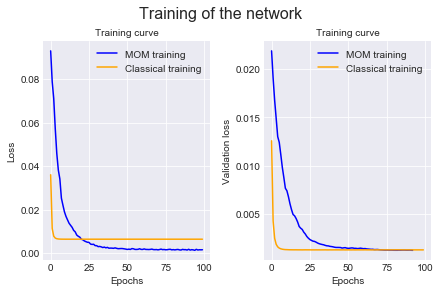

In [7]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Training of the network", fontsize=16)

ax1.plot(MOM_nn.history['loss'] , color = "blue" , label = "MOM training")
ax1.plot(classical_nn.history['loss'] , color = 'orange' , label = "Classical training")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training curve", fontsize=10)

ax2.plot(MOM_nn.history['val_loss'][7:] , color = "blue" , label = "MOM training")
ax2.plot(classical_nn.history['val_loss'] , color = 'orange' , label = "Classical training")
ax2.legend()
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation loss")
ax2.set_title("Training curve", fontsize=10)
fig.show()
plt.savefig("training_curve_bis.png")

### The database

We want to classify crocodiles and pionguins extracted from tiny-resnet. In order to check if our training is robust to outliers, we corrupt our dataset with fish photos.

#### Data importation

In [8]:
def rescale(img):
    _,_,channel = img.shape
    tab = np.zeros(img.shape)
    for i in range(channel):
        mini = np.min(img[:,:,i])
        maxi = np.max(img[:,:,i])
        tab[:,:,i] = (img[:,:,i] - mini)/(maxi-mini)
    
    return tab

def plot_torch_img(img):
    
    np_img = img.numpy()
    np_img = np.swapaxes(np_img,0,2)
    plt.imshow(np_img)

In [15]:
images = []
target = []
croc,ping = [],[]
min_n , min_p = 1000 , 1000
i = 0

for animal in ["crocodile" , "pinguin"] : 
    
    file = os.listdir("data/tiny-imagenet-200/train/" + animal + "/images")
    
    for f in file : 
        
        img = Image.open("data/tiny-imagenet-200/train/" + animal + "/images/" + f)
        n,p = img.size
        height = min(n,p)
        box = ( 0 , 0 , height , height)
        img = img.crop(box)  # On rend l'image carré en la rognant
        #img = img.resize(( 224 , 224 ))   # On standardise la taille de l'image 
        if len(np.array(img).shape) == 3 : 
            
            if animal == 'crocodile':
                croc.append(rescale(np.array(img)))
            else:
                ping.append(rescale(np.array(img)))
                
            images.append(rescale(np.array(img)))
            target.append([i])
            
    i += 1

outliers_1 = []

file = os.listdir("data/tiny-imagenet-200/train/fish/images")
    
for f in file : 
        
    img = Image.open("data/tiny-imagenet-200/train/fish/images/" + f)
    n,p = img.size
    height = min(n,p)
    box = ( 0 , 0 , height , height)
    img = img.crop(box)
    if len(np.array(img).shape) == 3 : 
            
        outliers_1.append(rescale(np.array(img)))

images_train , images_test , target_train , target_test = train_test_split(images , target ,
                                                                           random_state = random_seed)

In [16]:
hist_croc_R = []
hist_croc_G = []
hist_croc_B = []
hist_ping_R = []
hist_ping_G = []
hist_ping_B = []
hist_fish_R = []
hist_fish_G = []
hist_fish_B = []

for i in croc:
    hist_croc_R.append(np.mean(i[:,:,0]))
    hist_croc_G.append(np.mean(i[:,:,1]))
    hist_croc_B.append(np.mean(i[:,:,2]))

for i in ping:
    hist_ping_R.append(np.mean(i[:,:,0]))
    hist_ping_G.append(np.mean(i[:,:,1]))
    hist_ping_B.append(np.mean(i[:,:,2]))
    
for i in outliers_1:
    hist_fish_R.append(np.mean(i[:,:,0]))
    hist_fish_G.append(np.mean(i[:,:,1]))
    hist_fish_B.append(np.mean(i[:,:,2]))

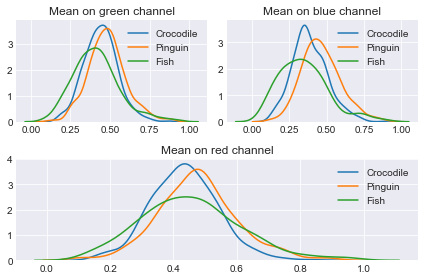

In [17]:
plt.subplot(212)
sns.distplot(hist_croc_R, bins = [i/100 for i in range(100)], hist = False, kde = True, label = "Crocodile")
sns.distplot(hist_ping_R, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Pinguin')
sns.distplot(hist_fish_R, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Fish')
plt.title('Mean on red channel')

plt.subplot(221)
sns.distplot(hist_croc_G, bins = [i/100 for i in range(100)], hist = False, kde = True, label = "Crocodile")
sns.distplot(hist_ping_G, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Pinguin')
sns.distplot(hist_fish_G, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Fish')
plt.title('Mean on green channel')

plt.subplot(222)
sns.distplot(hist_croc_B, bins = [i/100 for i in range(100)], hist = False, kde = True, label = "Crocodile")
sns.distplot(hist_ping_B, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Pinguin')
sns.distplot(hist_fish_B, bins = [i/100 for i in range(100)], hist = False, kde = True, label = 'Fish')
plt.title('Mean on blue channel')
plt.tight_layout()
plt.savefig("distribution_img.png")

#### Creation of the black and white outliers

In [18]:
n_outliers_2 = 10
outliers_2 = []
target_outliers_2 = []

for i in range(n_outliers_2):
    outliers_2.append(np.ones(images[0].shape)*randint(0,1))
    target_outliers_2.append([randint(0,1)])

#### Creation of the gaussian noise outliers

In [19]:
n_outliers_3 = 10
outliers_3 = []
target_outliers_3 = []

for i in range(n_outliers_3):
    outliers_3.append(np.random.normal(size = images[0].shape))
    target_outliers_3.append([randint(0,1)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


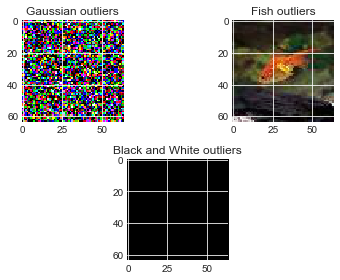

In [20]:
%matplotlib inline
plt.subplot(212)
plt.title("Black and White outliers")
plt.imshow(outliers_2[1])

plt.subplot(221)
plt.title("Gaussian outliers")
plt.imshow(outliers_3[1])

plt.subplot(222)
plt.title("Fish outliers")
plt.imshow(outliers_1[1])

plt.tight_layout()
plt.savefig("outliers.png")

#### Creation of the fish outliers and the corrupted train set

In [21]:
n_outliers_1 = 0

for i in range(n_outliers_1):
    images_train.append(outliers_1[i])
    target_train.append([randint(0,1)])
    
images_train += outliers_2
images_train += outliers_3
target_train += target_outliers_2
target_train += target_outliers_3

target_train = torch.FloatTensor(target_train)
target_test = torch.FloatTensor(target_test)

#### Data transformation

First we create a transformer in order to transform np.array to torch.tensor with the channels in the first dimension.

In [22]:
transformer = transforms.Compose( [ transforms.ToTensor() ])
data_train = indexed_dataset.Dataset(images_train , target_train , transform = transformer)
data_test = indexed_dataset.Dataset(images_test , target_test , transform = transformer)

### The network

For the architecture of my network, I used 3 convolutional layers with Relu activation, each followed by a max pooling layer, in order to extract the best feature. Then I had a dense layer with sigmoid activation in order to do 0/1 classification.

In [23]:
class CNN(torch.nn.Module):
    
    #Our batch shape for input x is (3 , 64 , 64)
    
    def __init__(self):
        super(CNN, self).__init__()
        
        #input channels = 3, output channels = 16
        self.block_1 = torch.nn.Sequential(torch.nn.Conv2d(3 , 32 , 3 , stride = 1 , padding = 0),
                                     torch.nn.BatchNorm2d(32),
                                     torch.nn.ReLU(),
                                     torch.nn.MaxPool2d(3))
        
        #Input channels = 16, output channels = 32
        self.block_2 = torch.nn.Sequential(torch.nn.Conv2d(32 , 64 , 3 , stride = 1 , padding = 0),
                                     torch.nn.BatchNorm2d(64),
                                     torch.nn.ReLU(),
                                     torch.nn.MaxPool2d(2))
        
        #Input channels = 32, output channels = 64
        self.block_3 = torch.nn.Sequential(torch.nn.Conv2d(64 , 128 , 3 , stride = 1 , padding = 0),
                                     torch.nn.BatchNorm2d(128),
                                     torch.nn.ReLU(),
                                     torch.nn.MaxPool2d(2))
        
        #128 input features, 1 output features for binary classification
        self.fc1 = torch.nn.Linear(1152, 1)
        
        #self.conv_dropout = nn.Dropout2d(p = 0.0)
        self.dense_dropout = torch.nn.Dropout(p = 0.0)
        
    def forward(self, x):
        #print("1:", (x == x).all())
        #Computes the Fivation of the first convolution
        #Size changes from (3, 64, 64) to (32, 20, 20)
        x = self.block_1(x)
        #print(x.size())
        #print("1:", (x == x).all())
        
        #Size changes from (32, 20, 20) to (64, 9, 9)
        x = self.block_2(x)
        #print(x.size())
        #print("2:", (x == x).all())
        
        #Size changes from (64, 9, 9) to (128, 3, 3)
        x = self.block_3(x)
        #print(x.size())
        #print("3:", (x == x).all())
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (128 , 1 , 1) to (,1152)
        #Recall that the -1 infers this dimension from the other given dimension
        #print(x.size())
        x = x.view(-1,1152)
        
        #Computes the Fivation of the fully connected layer
        #Size changes from (1, 2304) to (1, 1)
        x = torch.sigmoid(self.dense_dropout(self.fc1(x)))
        
        return(x)

### Training

We use Adam optimizer and our loss is the classical binary cross entropy with a logistic loss which can be calculated with the following formula : 
$$ BCE(y,\widehat{y}) = -(ylog(\widehat{y})+(1-y)log(1-\widehat{y}))$$

In [24]:
CNN_ = CNN()
optimizer = torch.optim.Adam( CNN_.parameters(), lr=0.001)
loss_ = torch.nn.modules.loss.BCELoss(reduction = 'mean')

In [25]:
MOM_CNN = MOM_training.mom_net(CNN_ , optimizer , loss_ , random_seed = random_seed, n_epochs = 250 , batch_size = 16, n_hist = 200)
MOM_CNN.fit(data_train , data_val = data_test, acc = True)
#torch.save(MOM_CNN.model.state_dict(), "models/CNN_1")

Epoch n°0 ( 5.0 sec) : loss = 0.7281748056411743 ,validation loss =  0.7030525803565979 , accuracy : 0.5958279009126467 , validation accuracy : 0.4899598393574297
Epoch n°1 ( 4.0 sec) : loss = 0.6602850556373596 ,validation loss =  0.6498432755470276 , accuracy : 0.6623207301173403 , validation accuracy : 0.5943775100401606
Epoch n°2 ( 3.0 sec) : loss = 0.6095272302627563 ,validation loss =  0.6365211009979248 , accuracy : 0.7105606258148631 , validation accuracy : 0.642570281124498
Epoch n°3 ( 3.0 sec) : loss = 0.5916019082069397 ,validation loss =  0.6132891774177551 , accuracy : 0.7340286831812256 , validation accuracy : 0.6827309236947792
Epoch n°4 ( 3.0 sec) : loss = 0.5728201866149902 ,validation loss =  0.5787507891654968 , accuracy : 0.7705345501955672 , validation accuracy : 0.7269076305220884
Epoch n°5 ( 3.0 sec) : loss = 0.5516549348831177 ,validation loss =  0.5383583307266235 , accuracy : 0.7861799217731421 , validation accuracy : 0.7309236947791165
Epoch n°6 ( 3.0 sec) : 

Epoch n°50 ( 3.0 sec) : loss = 0.2471044659614563 ,validation loss =  0.23303250968456268 , accuracy : 0.9126466753585397 , validation accuracy : 0.9156626506024096
Epoch n°51 ( 3.0 sec) : loss = 0.25435197353363037 ,validation loss =  0.2298264056444168 , accuracy : 0.9087353324641461 , validation accuracy : 0.9236947791164659
Epoch n°52 ( 3.0 sec) : loss = 0.25738826394081116 ,validation loss =  0.2277803122997284 , accuracy : 0.9087353324641461 , validation accuracy : 0.9196787148594378
Epoch n°53 ( 3.0 sec) : loss = 0.24953913688659668 ,validation loss =  0.22643762826919556 , accuracy : 0.9113428943937418 , validation accuracy : 0.9116465863453815
Epoch n°54 ( 4.0 sec) : loss = 0.232880637049675 ,validation loss =  0.22648091614246368 , accuracy : 0.9126466753585397 , validation accuracy : 0.9116465863453815
Epoch n°55 ( 3.0 sec) : loss = 0.2511667311191559 ,validation loss =  0.2252541482448578 , accuracy : 0.910039113428944 , validation accuracy : 0.9116465863453815
Epoch n°56 (

Epoch n°100 ( 4.0 sec) : loss = 0.1848624050617218 ,validation loss =  0.23516090214252472 , accuracy : 0.9374185136897001 , validation accuracy : 0.9116465863453815
Epoch n°101 ( 5.0 sec) : loss = 0.17415857315063477 ,validation loss =  0.22840358316898346 , accuracy : 0.9413298565840938 , validation accuracy : 0.9196787148594378
Epoch n°102 ( 5.0 sec) : loss = 0.17570389807224274 ,validation loss =  0.22436796128749847 , accuracy : 0.940026075619296 , validation accuracy : 0.9236947791164659
Epoch n°103 ( 5.0 sec) : loss = 0.16072173416614532 ,validation loss =  0.22215697169303894 , accuracy : 0.9426336375488917 , validation accuracy : 0.927710843373494
Epoch n°104 ( 4.0 sec) : loss = 0.16494448482990265 ,validation loss =  0.22365567088127136 , accuracy : 0.9387222946544981 , validation accuracy : 0.927710843373494
Epoch n°105 ( 7.0 sec) : loss = 0.16727329790592194 ,validation loss =  0.22440388798713684 , accuracy : 0.9426336375488917 , validation accuracy : 0.9236947791164659
Ep

Epoch n°150 ( 3.0 sec) : loss = 0.1862315982580185 ,validation loss =  0.23542407155036926 , accuracy : 0.9374185136897001 , validation accuracy : 0.9036144578313253
Epoch n°151 ( 3.0 sec) : loss = 0.1450922042131424 ,validation loss =  0.23264698684215546 , accuracy : 0.940026075619296 , validation accuracy : 0.9116465863453815
Epoch n°152 ( 4.0 sec) : loss = 0.15146851539611816 ,validation loss =  0.2274976670742035 , accuracy : 0.9465449804432855 , validation accuracy : 0.9156626506024096
Epoch n°153 ( 3.0 sec) : loss = 0.14936012029647827 ,validation loss =  0.21972224116325378 , accuracy : 0.954367666232073 , validation accuracy : 0.927710843373494
Epoch n°154 ( 3.0 sec) : loss = 0.12973728775978088 ,validation loss =  0.21413849294185638 , accuracy : 0.9582790091264668 , validation accuracy : 0.9317269076305221
Epoch n°155 ( 3.0 sec) : loss = 0.16314177215099335 ,validation loss =  0.2071923166513443 , accuracy : 0.9634941329856584 , validation accuracy : 0.9317269076305221
Epoch

Epoch n°200 ( 4.0 sec) : loss = 0.0672672763466835 ,validation loss =  0.21749626100063324 , accuracy : 0.9674054758800521 , validation accuracy : 0.9196787148594378
Epoch n°201 ( 3.0 sec) : loss = 0.10261952877044678 ,validation loss =  0.21746940910816193 , accuracy : 0.9661016949152542 , validation accuracy : 0.9156626506024096
Epoch n°202 ( 4.0 sec) : loss = 0.08756488561630249 ,validation loss =  0.2188359647989273 , accuracy : 0.9674054758800521 , validation accuracy : 0.9156626506024096
Epoch n°203 ( 3.0 sec) : loss = 0.09443387389183044 ,validation loss =  0.21971134841442108 , accuracy : 0.9674054758800521 , validation accuracy : 0.9156626506024096
Epoch n°204 ( 3.0 sec) : loss = 0.11225193738937378 ,validation loss =  0.22424781322479248 , accuracy : 0.9661016949152542 , validation accuracy : 0.9196787148594378
Epoch n°205 ( 3.0 sec) : loss = 0.1233334168791771 ,validation loss =  0.22556181252002716 , accuracy : 0.9674054758800521 , validation accuracy : 0.9196787148594378
E

Training curves

In [48]:
CNN_classic = CNN()
optimizer_classic = torch.optim.SGD( CNN_classic.parameters(), lr=0.01)
loss_classic = torch.nn.modules.loss.BCELoss(reduction = 'mean')
classical_cnn = class_train.mom_net(CNN_classic , optimizer_classic , loss_classic, random_seed = random_seed, n_epochs = 250 , batch_size = 16, n_hist = 250)
classical_cnn.fit(data_train, data_val = data_test, acc = True)

Epoch n°0 ( 7.0 sec) : loss = 0.5422732459103808 ,validation loss =  0.341836154460907 , accuracy : 0.863102998696219 , validation accuracy : 0.8714859437751004
Epoch n°1 ( 5.0 sec) : loss = 0.38950370553326097 ,validation loss =  0.3442996144294739 , accuracy : 0.8970013037809648 , validation accuracy : 0.8634538152610441
Epoch n°2 ( 6.0 sec) : loss = 0.33682000256599265 ,validation loss =  0.3777977526187897 , accuracy : 0.8865710560625815 , validation accuracy : 0.8433734939759037
Epoch n°3 ( 5.0 sec) : loss = 0.28408540595085063 ,validation loss =  0.23634782433509827 , accuracy : 0.9152542372881356 , validation accuracy : 0.9156626506024096
Epoch n°4 ( 5.0 sec) : loss = 0.2594149972688645 ,validation loss =  0.26432061195373535 , accuracy : 0.9322033898305084 , validation accuracy : 0.9076305220883534
Epoch n°5 ( 5.0 sec) : loss = 0.2448059064435198 ,validation loss =  0.2321762889623642 , accuracy : 0.940026075619296 , validation accuracy : 0.9317269076305221
Epoch n°6 ( 5.0 sec)

Epoch n°50 ( 6.0 sec) : loss = 0.021720674483382958 ,validation loss =  0.24661143124103546 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°51 ( 6.0 sec) : loss = 0.023538375216377697 ,validation loss =  0.244828462600708 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°52 ( 5.0 sec) : loss = 0.023631586391042844 ,validation loss =  0.2435687780380249 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°53 ( 6.0 sec) : loss = 0.022370546973221238 ,validation loss =  0.25654736161231995 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°54 ( 6.0 sec) : loss = 0.022810291528622528 ,validation loss =  0.2721303701400757 , accuracy : 0.9973924380704041 , validation accuracy : 0.9196787148594378
Epoch n°55 ( 5.0 sec) : loss = 0.023129736994730036 ,validation loss =  0.2917434871196747 , accuracy : 0.9973924380704041 , validation accuracy : 0.9156626506024096
Epoch

Epoch n°100 ( 5.0 sec) : loss = 0.02257139004638141 ,validation loss =  0.2548014223575592 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°101 ( 5.0 sec) : loss = 0.011276833197235702 ,validation loss =  0.25957271456718445 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875502
Epoch n°102 ( 5.0 sec) : loss = 0.01163861167584942 ,validation loss =  0.2655269503593445 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°103 ( 5.0 sec) : loss = 0.012496430216607282 ,validation loss =  0.2659207284450531 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°104 ( 5.0 sec) : loss = 0.010749666696473799 ,validation loss =  0.26463374495506287 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875502
Epoch n°105 ( 5.0 sec) : loss = 0.011008575349981758 ,validation loss =  0.2587430775165558 , accuracy : 0.9973924380704041 , validation accuracy : 0.9397590361445783


Epoch n°150 ( 5.0 sec) : loss = 0.008380529399530247 ,validation loss =  0.2871094048023224 , accuracy : 0.9973924380704041 , validation accuracy : 0.9236947791164659
Epoch n°151 ( 5.0 sec) : loss = 0.008892864977787346 ,validation loss =  0.28240522742271423 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°152 ( 5.0 sec) : loss = 0.008885285236558163 ,validation loss =  0.2790510356426239 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°153 ( 5.0 sec) : loss = 0.008147156361411226 ,validation loss =  0.2765553891658783 , accuracy : 0.9973924380704041 , validation accuracy : 0.927710843373494
Epoch n°154 ( 5.0 sec) : loss = 0.008736582507287708 ,validation loss =  0.27323105931282043 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°155 ( 5.0 sec) : loss = 0.009138571443667816 ,validation loss =  0.29566678404808044 , accuracy : 0.9973924380704041 , validation accuracy : 0.92369477911646

Epoch n°199 ( 5.0 sec) : loss = 0.008221870369372015 ,validation loss =  0.27594172954559326 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875502
Epoch n°200 ( 5.0 sec) : loss = 0.008651020006893419 ,validation loss =  0.2846713066101074 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°201 ( 5.0 sec) : loss = 0.008337350634045582 ,validation loss =  0.28544408082962036 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°202 ( 5.0 sec) : loss = 0.009949734768715062 ,validation loss =  0.26434722542762756 , accuracy : 0.9973924380704041 , validation accuracy : 0.9317269076305221
Epoch n°203 ( 5.0 sec) : loss = 0.00840460146502393 ,validation loss =  0.2739616334438324 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875502
Epoch n°204 ( 5.0 sec) : loss = 0.008215592946842354 ,validation loss =  0.2820154130458832 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875

Epoch n°249 ( 5.0 sec) : loss = 0.008328269873132703 ,validation loss =  0.27773311734199524 , accuracy : 0.9973924380704041 , validation accuracy : 0.9357429718875502
Training finished


In [49]:
history = MOM_CNN.history
history_class = classical_cnn.history
model = MOM_CNN.model

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


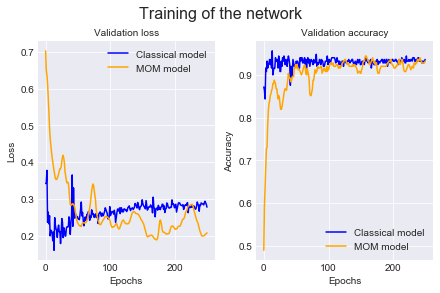

In [53]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Training of the network", fontsize=16)

ax1.plot(history_class['val_loss'] , color = "blue" , label = "Classical model")
ax1.plot(history['val_loss'] , color = 'orange' , label = "MOM model")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Validation loss", fontsize=10)

ax2.plot(history_class['val_acc'] , color = "blue" , label = "Classical model")
ax2.plot(history['val_acc'] , color = 'orange' , label = "MOM model")
ax2.legend()
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Validation accuracy", fontsize=10)
fig.show()
plt.savefig("training_curve.png")

#### Outliers detection

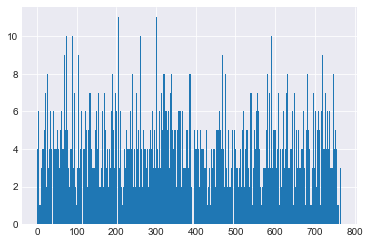

In [30]:
non_outliers = np.unique(MOM_CNN.history['hist'])
freq = plt.hist(MOM_CNN.history['hist'] , bins = np.arange(len(data_train)+1))[0]

In [62]:
np.mean(freq)

4.172099087353325

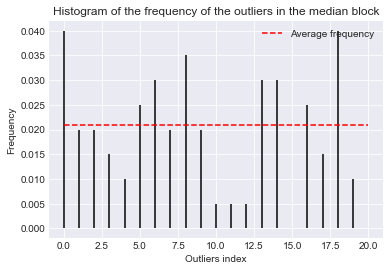

In [73]:
plt.vlines(np.arange(20), ymin = np.zeros(20), ymax = freq[-20:]/200)
plt.hlines(4.17209908/200, xmin = 0, xmax = 20, color = 'red', linestyle = '--', label = "Average frequency")
plt.xlabel("Outliers index")
plt.ylabel("Frequency")
plt.title("Histogram of the frequency of the outliers in the median block")
plt.legend()
plt.savefig("hist_out.png")

In [31]:
outliers = []

for i in range(len(data_train)):
    if i not in non_outliers:
        outliers.append(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


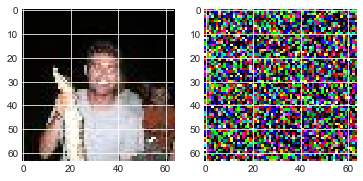

In [47]:
plt.subplot(121)
np_img = data_train[outliers[-2]][0].numpy()
np_img = np.swapaxes(np_img,0,2)
np_img[:,:,0]  = np.transpose(np_img[:,:,0])
np_img[:,:,1]  = np.transpose(np_img[:,:,1])
np_img[:,:,2]  = np.transpose(np_img[:,:,2])
plt.imshow(np_img)

plt.subplot(122)
np_img = data_train[outliers[-1]][0].numpy()
np_img = np.swapaxes(np_img,0,2)
np_img[:,:,0]  = np.transpose(np_img[:,:,0])
np_img[:,:,1]  = np.transpose(np_img[:,:,1])
np_img[:,:,2]  = np.transpose(np_img[:,:,2])
plt.imshow(np_img)

plt.savefig("outliers_detected.png")

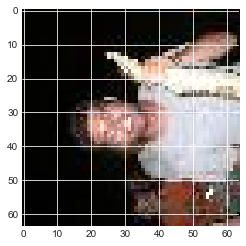

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


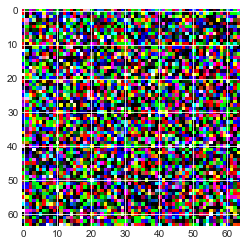

In [33]:
for i,x in enumerate(outliers[-2:]):
    plot_torch_img(data_train[x][0])
    plt.show()

### Test

In [87]:
#model = CNN()
#model.load_state_dict(torch.load("models/CNN_1"))

X = torch.stack([data_train[i][0] for i in range(len(data_train))]).float()
Y = torch.stack([data_train[i][1] for i in range(len(data_train))]).float().detach().numpy().flatten()
pred = model(X).detach().numpy().flatten()
pred[pred>0.5] = 1
pred[pred<=0.5] = 0
print("Accuracy on the test set :",1-np.sum(np.abs(pred-Y))/len(Y))

Accuracy on the test set : 0.9687092568448501


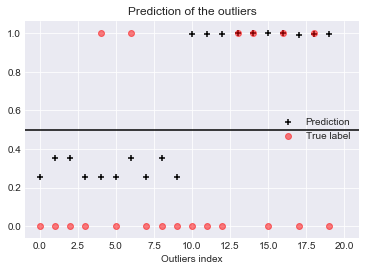

In [97]:
plt.scatter(np.arange(20), model(X).detach().numpy().flatten()[-20:], color = "black", marker = "+", label = 'Prediction')
plt.scatter(np.arange(20), Y[-20:], color = "red", alpha = 0.5, label = "True label")
plt.hlines(0.5, xmin = -1, xmax = 21)
plt.xlim(-1,21)
plt.xlabel("Outliers index")
plt.title("Prediction of the outliers")
plt.legend()
plt.savefig("pred_out.png")

### Test of the robustness

In [9]:
images = []
target = []
min_n , min_p = 1000 , 1000
i = 0

for animal in ["crocodile" , "pinguin"] : 
    
    file = os.listdir("data/tiny-imagenet-200/train/" + animal + "/images")
    
    for f in file : 
        
        img = Image.open("data/tiny-imagenet-200/train/" + animal + "/images/" + f)
        n,p = img.size
        height = min(n,p)
        box = ( 0 , 0 , height , height)
        img = img.crop(box)  # On rend l'image carré en la rognant
        #img = img.resize(( 224 , 224 ))   # On standardise la taille de l'image 
        if len(np.array(img).shape) == 3 : 
            
            images.append(np.array(img)/255)
            target.append(i)
            
    i += 1

outliers = []

file = os.listdir("data/tiny-imagenet-200/train/fish/images")
    
for f in file : 
        
    img = Image.open("data/tiny-imagenet-200/train/fish/images/" + f)
    n,p = img.size
    height = min(n,p)
    box = ( 0 , 0 , height , height)
    img = img.crop(box)
    if len(np.array(img).shape) == 3 : 
            
        outliers.append(np.array(img)/255)
        
images_train , images_test , target_train , target_test = train_test_split(images , target , random_state = random_seed)

In [ ]:
data_test = indexed_dataset.Dataset(images_test , torch.FloatTensor(target_test).view(-1,1) , transform = transformer)
history_MOM = []
history_class = []
outliers_2 = []
target_outliers_2 = []
bar = progressbar.progressbar

for i in range(200):
    outliers_2.append(rescale(np.random.normal(0, 1, images[i].shape)))
    target_outliers_2.append(randint(0,1))
    
for n_outliers in bar(range(1, 101, 10)):
    
    images_train_prime = images_train + outliers_2[:n_outliers]
    target_train_prime = target_train + target_outliers_2[:n_outliers]
    data_train = indexed_dataset.Dataset(images_train_prime , torch.FloatTensor(target_train_prime).view(-1,1) , transform = transformer)

    model_MOM = CNN()
    optimizer_MOM = torch.optim.Adam(model_MOM.parameters(), lr = 0.001)
    loss_MOM = torch.nn.modules.loss.BCEWithLogitsLoss(reduction = 'mean')
    MOM_CNN = MOM_training.mom_net(model_MOM, optimizer_MOM,
                                   loss_MOM, random_seed = random_seed,
                                   batch_size = 16, n_epochs = 250, n_hist = 0)
    MOM_CNN.fit(data_train, data_val = data_test, acc = True)
    

    model_classic = CNN()
    optimizer_classic = torch.optim.Adam( model_classic.parameters(), lr=0.001)
    loss_classic = torch.nn.modules.loss.BCEWithLogitsLoss(reduction = 'mean')
    classical_cnn = class_train.mom_net(model_classic , optimizer_classic,
                                        loss_classic, random_seed = random_seed,
                                        n_epochs = 100 , batch_size = 16, n_hist = 0)
    classical_cnn.fit(data_train, data_val = data_test, acc = True)

    
    history_MOM.append(MOM_CNN.history)
    history_class.append(classical_cnn.history)

In [22]:
MOM_dict = {}
class_dict = {}
for i in range(10):
    MOM_dict[i] = history_MOM[i]
    class_dict[i] = history_class[i]

In [23]:
import pickle
pickle.dump(MOM_dict, open( "momdico.p", "wb" ) )
pickle.dump(class_dict, open( "classdico.p", "wb" ) )

In [49]:
MOM_acc = []
MOM_loss = []
MOM_acc_bis = []
class_acc = []
class_loss = []
class_acc_bis = []

for i in range(10):
    MOM_acc.append(max(MOM_dict[i]['val_acc']))
    class_acc.append(max(class_dict[i]['val_acc']))
    MOM_loss.append(max(MOM_dict[i]['val_loss']))
    class_loss.append(max(class_dict[i]['val_loss']))
    MOM_acc_bis.append(MOM_dict[i]['val_acc'][-1])
    class_acc_bis.append(class_dict[i]['val_acc'][-1])

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


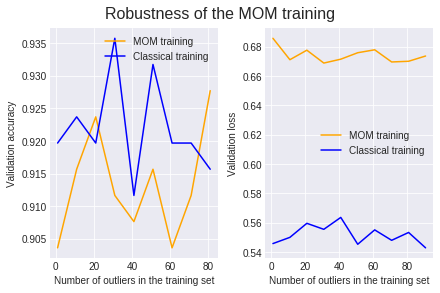

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Robustness of the MOM training", fontsize=16)

ax1.plot(list(range(1,91,10)), MOM_acc[:-1], color = 'orange', label = "MOM training")
ax1.plot(list(range(1,91,10)), class_acc[:-1], color = 'blue', label = "Classical training")
ax1.set_xlabel("Number of outliers in the training set")
ax1.set_ylabel("Validation accuracy")
ax1.legend()


ax2.plot(list(range(1,101,10)), MOM_loss, color = 'orange', label = "MOM training")
ax2.plot(list(range(1,101,10)), class_loss, color = 'blue', label = "Classical training")
ax2.set_xlabel("Number of outliers in the training set")
ax2.set_ylabel("Validation loss")
ax2.legend()

fig.show()
plt.savefig("robustness_deep.png")

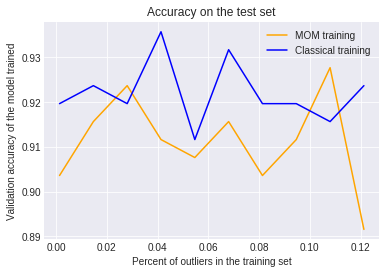

In [63]:
plt.plot(np.array(range(1,101,10))/750, MOM_acc, color = 'orange', label = "MOM training")
plt.plot(np.array(range(1,101,10))/750, class_acc, color = 'blue', label = "Classical training")
plt.xlabel("Percent of outliers in the training set")
plt.ylabel("Validation accuracy of the model trained")
plt.legend()
plt.title("Accuracy on the test set")
plt.savefig("robust_deep_2.png")